In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape = False)
X_train, y_train = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert (len(X_validation) == len(y_validation))
assert (len(X_test) == len(y_test))

print("Image shape = {}".format(X_train[0].shape))
print("Training Set size = {}".format(len(X_train)))
print("Validation set size = {}".format(len(X_validation)))
print("Test set size = {}".format(len(X_test)))



C:\Users\jinku\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Image shape = (28, 28, 1)
Training Set size = 55000
Validation set size = 5000
Test set size = 10000


In [2]:
import numpy as np

X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2) , (0,0)), 'constant')

print("Updated size of train images = {}".format(X_train[0].shape))
print("Updated size of validation images = {}".format(X_validation[0].shape))
print("Updated size of test images = {}".format(X_test[0].shape))





Updated size of train images = (32, 32, 1)
Updated size of validation images = (32, 32, 1)
Updated size of test images = (32, 32, 1)


0


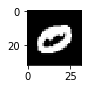

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize = (1,1))
plt.imshow(image, cmap = "gray")
print(y_train[index])



In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [5]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6], mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    
    pool_1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID')+ conv2_b
    
    conv2 = tf.nn.relu(conv2)
    
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    fc1 = flatten(pool_2)
    
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1, fc1_w)+ fc1_b
    
    fc1 = tf.nn.relu(fc1)
    
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w)+ fc2_b
    
    fc2 = tf.nn.relu(fc2)
    
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84, 10), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits
    
    
    
    
                         
    

In [7]:
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, 10)


In [8]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data) : 
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE) :
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y: batch_y})
        total_accuracy = total_accuracy + (accuracy * len(batch_x))
    return total_accuracy / num_examples
    

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print("")
    
    for i in range(EPOCHS) :
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE) :
            end = offset+BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x:batch_x, y:batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver = tf.train.Saver()
    saver.save(sess, './lenet')
    print("Model Saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.967

EPOCH 2 ...
Validation Accuracy = 0.973

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.985

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.986

EPOCH 7 ...
Validation Accuracy = 0.987

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.987

Model Saved


In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test accuracy = {:.3f}".format(test_accuracy))
    
    

INFO:tensorflow:Restoring parameters from .\lenet
Test accuracy = 0.988
